In [1]:
__copyright__ = "Copyright 2017, HH-HZI Project"
__author__ = "Ehsaneddin Asgari"
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Ehsaneddin Asgari"
__email__ = "asgari@berkeley.edu ehsaneddin.asgari@helmholtz-hzi.de"

import sys
sys.path.append('../')
import numpy as np
from data_access.data_create_utility import ABRDataCreate
from utility.math_utility import get_kl_rows
from utility.visualization_utility import create_mat_plot
import pandas as pd
from utility.file_utility import FileUtility
import pandas as pd
from pandas import Series
from sklearn.metrics import mutual_info_score
from utility.matrix_visualization import create_correlation_mat, create_kl_plot

class PhenotypeTable(object):
    
    def __init__(self, path, categorical_labels=False):
        # load ABRDataCreat for basic access
        self.phenotype_table=pd.read_table(path)
        self.phenotypes=self.phenotype_table.columns.tolist()[1::]
        self.samples=self.phenotype_table[self.phenotype_table.columns.tolist()[0]].tolist()
        # init to be filled by make_phenotype_vector
        self.penotype_vector=[]
        if not categorical_labels:
            self.make_phenotype_value_vec()
        else:
            self.make_phenotype_class_vec()
        
    def get_sample_list(self):
        '''
        Get the sample list
        :return:
        '''
        return self.samples
    
    def make_phenotype_class_vec(self):
        '''
        '''

        self.matrix=self.phenotype_table[self.phenotypes]
        res_matrix=[]
        for x in self.phenotypes:
            row=[]
            for y in self.phenotypes:
                score=mutual_info_score(self.matrix[x].tolist(),self.matrix[y].tolist())
                row.append(score)
            res_matrix.append(row)
        self.phenotype_MI=res_matrix

    def make_phenotype_value_vec(self, NaNVal=0.5):
        self.matrix=self.phenotype_table[self.phenotypes].fillna(NaNVal).values
        self.phenotype_KL=self.get_phenotype_kl_divergence()
        self.sample_KL=self.get_sample_kl_divergence()
        
        self.phenotype_df = pd.DataFrame(data=self.matrix,
                 columns=self.phenotypes)
        self.sample_df = pd.DataFrame(data=self.matrix.T,
                 columns=self.samples)
        

    def get_phenotype_kl_divergence(self):
        '''
        :return: kl-div between phenotypes
        '''
        KL=get_kl_rows(self.matrix.T)
        KL=KL/np.max(KL)
        return KL

    def get_sample_kl_divergence(self):
        '''
        :return: kl-div between samples
        '''
        KL=get_kl_rows(self.matrix)
        KL=KL/np.max(KL)
        return KL
    
    def get_phenotype_correlation_coefficient(self):
        '''
        :return: Return Pearson product-moment correlation coefficients
        '''
        return np.corrcoef(self.matrix.T)
    
    def get_sample_correlation_coefficient(self):
        '''
        :return: Return Pearson product-moment correlation coefficients
        '''
        return np.corrcoef(self.matrix)


    def plot_kl_divergences(self, filename):
        '''
        :param filename
        to play with colormaps https://matplotlib.org/users/colormaps.html
        '''
        create_kl_plot(self.phenotype_KL,self.phenotypes,'Normalized phenotype divergence',filename,'','',cmap='Purples',filetype='png')
        create_kl_plot(self.sample_KL,self.samples,'Normalized sample divergences (based on phenotype)',filename,'','',cmap='Purples',filetype='png')

    def plot_corr(self, filename, toexclude=['']):
        '''
        :param filename
        to play with colormaps https://matplotlib.org/users/colormaps.html
        '''
        create_correlation_mat(filename+'corr_phenotype', self.phenotype_df.drop(toexclude, axis=1))
        create_correlation_mat(filename+'corr_sample', self.sample_df)

In [2]:
PT=PhenotypeTable('/mounts/data/proj/asgari/Pseudogenomics/metadata/phenotypes.txt')

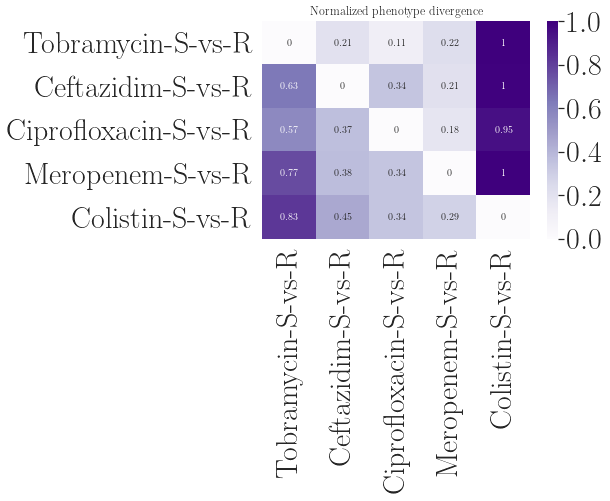

In [ ]:
PT.plot_kl_divergences('RESIS_kl')

/mounts/Users/student/asgari/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


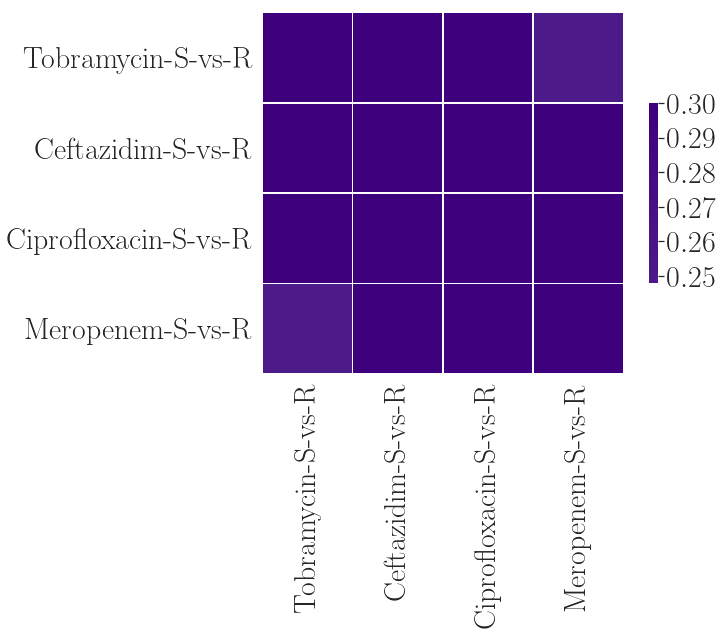

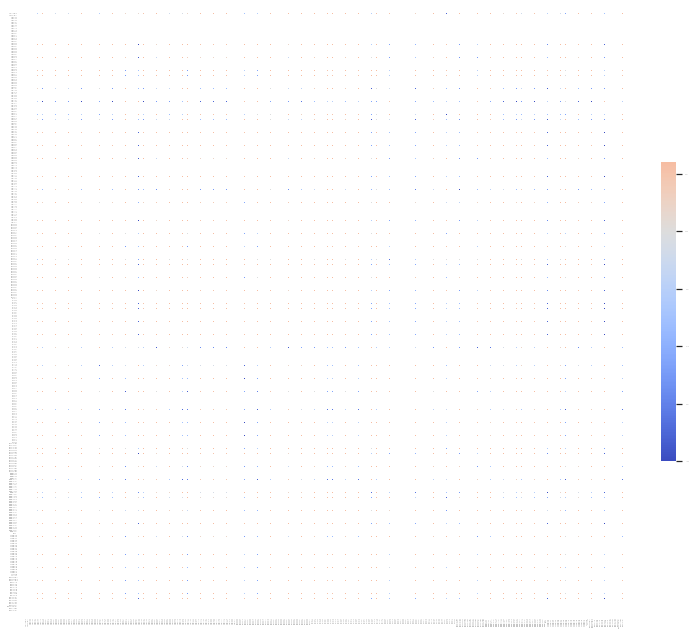

In [4]:
PT.plot_corr('RESIST',['Colistin_S-vs-R'])

In [51]:
np.array(PT.get_correlation_coefficient()).shape

/mounts/Users/student/asgari/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/mounts/Users/student/asgari/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(414, 414)

In [19]:
isolates=PT.phenotype_table[PT.phenotype_table.columns[0]]

In [29]:
phenotypes=[x for x in PT.phenotype_table.columns[1::]]

In [63]:
a=PT.phenotype_table[[x for x in PT.phenotype_table.columns[1::]]]

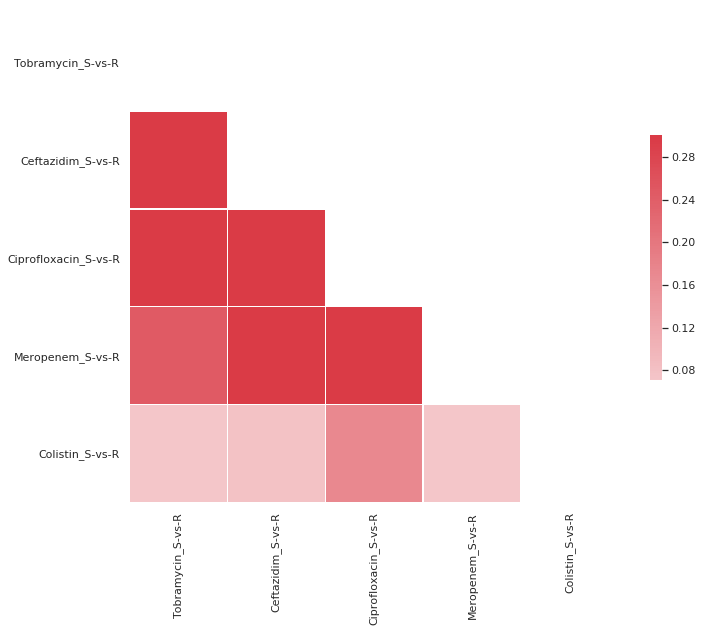

In [67]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = PT.phenotype_df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})